In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import time

Generating random adjacency matrix 

In [194]:
def generate_matrix(nodes=100, edges=500):    

    matrix = np.zeros((nodes,nodes), dtype=int)

    for _ in range(edges):
        x = np.random.randint(nodes)
        y = np.random.randint(nodes)

        while matrix[x, y] > 0:
            x = np.random.randint(nodes)
            y = np.random.randint(nodes)

        if x != y and matrix[x, y] == 0:
            weight = np.random.randint(100)
            matrix[x, y] = weight
            matrix[y, x] = weight
    
    return matrix

In [195]:
matrix = generate_matrix()
graph = nx.from_numpy_matrix(matrix)

In [196]:
nx.to_dict_of_lists(graph)

{0: [5, 9, 17, 18, 44, 56, 57, 61, 75],
 1: [2, 6, 24, 36, 38, 44, 50, 61, 63, 66],
 2: [1, 5, 18, 27, 31, 36, 55, 85, 90],
 3: [35, 42, 60, 61, 62, 73, 87],
 4: [11, 12, 54, 60, 67, 77, 79, 94],
 5: [0, 2, 6, 10, 17, 34, 44, 52],
 6: [1, 5, 29, 54, 56, 81, 88],
 7: [32, 41, 59, 61],
 8: [15, 19, 23, 39, 63, 71, 80, 88],
 9: [0, 11, 18, 21, 34, 41, 48, 56, 64, 76, 81, 91, 94, 95],
 10: [5, 25, 37, 41, 60, 78, 79, 83, 85, 96, 98],
 11: [4, 9, 24, 31, 35, 56, 79, 88, 89, 95],
 12: [4, 15, 55, 57, 61, 62, 63, 64, 66, 75, 87, 92, 98],
 13: [53, 56, 66, 86, 92, 95, 97],
 14: [29, 31, 46, 53, 87],
 15: [8, 12, 17, 18, 23, 54, 60, 68, 70, 76, 83, 87, 98],
 16: [28, 29, 33, 55, 61, 74, 93],
 17: [0, 5, 15, 24, 47, 48, 72],
 18: [0, 2, 9, 15, 24, 28, 29, 34, 52, 81, 91],
 19: [8, 34, 38, 41, 54, 55, 56, 58, 63, 67, 68, 84],
 20: [22, 37, 45, 46, 49, 61, 72, 76, 81, 86, 96],
 21: [9, 25, 27, 29, 89],
 22: [20, 27, 73, 75, 80, 89, 90, 98],
 23: [8, 15, 28, 34, 63, 67, 77, 78, 94],
 24: [1, 11, 17

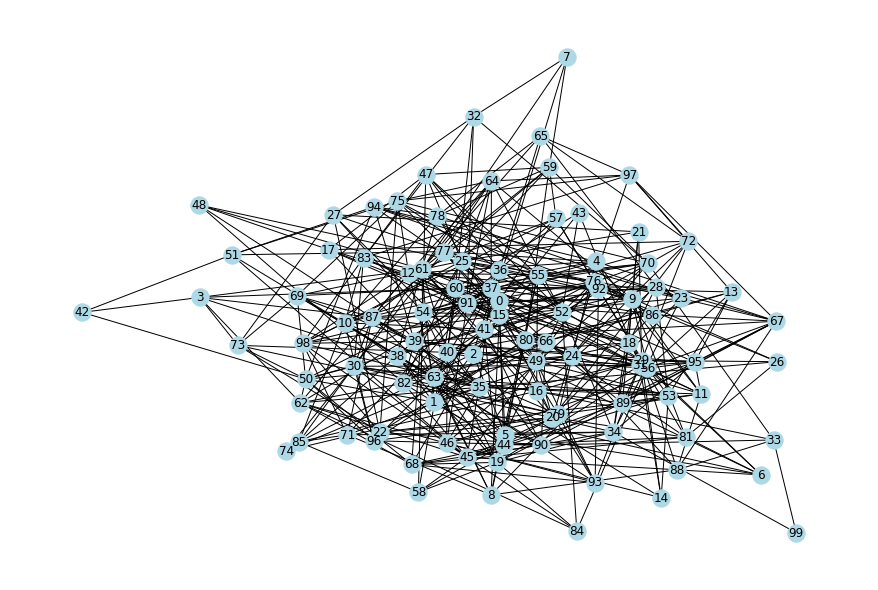

In [197]:
plt.figure(figsize=(12,8))
nx.draw(graph, node_color = "lightblue", with_labels=True)

In [198]:
n_experiments = 10
source = np.random.randint(0, 100)
target = [np.random.randint(0, 100) for _ in range(n_experiments)]

Dijkstra's algorithm

In [199]:
times = []

for i in range(n_experiments):
    start = time.time()
    print(nx.dijkstra_path(graph, source, target[i], "weight"))
    times.append(time.time() - start)


print(f'Dijkstra\'s average time: {np.mean(times)}')

[15, 98, 35, 48, 9, 95, 31, 43]
[15, 98, 10, 83, 32, 91, 46]
[15, 98, 10, 79]
[15, 98, 22, 27]
[15, 98, 22, 75, 70, 60, 92]
[15, 98, 10, 83, 32, 91, 62, 3]
[15, 98, 35, 45]
[15, 8, 19]
[15, 98, 35]
[15, 98, 12, 66]
Dijkstra's average time: 0.00029909610748291016


Bellman-Ford algorithm

In [200]:
times = []

for i in range(n_experiments):
    start = time.time()
    print(nx.bellman_ford_path(graph, source, target[i], 'weight'))
    times.append(time.time() - start)

print(f'Bellman-Ford\'s average time: {np.mean(times)}')

[15, 98, 35, 48, 9, 95, 31, 43]
[15, 98, 10, 83, 32, 91, 46]
[15, 98, 10, 79]
[15, 98, 22, 27]
[15, 98, 22, 75, 70, 60, 92]
[15, 98, 10, 83, 32, 91, 62, 3]
[15, 98, 35, 45]
[15, 8, 19]
[15, 98, 35]
[15, 98, 12, 66]
Bellman-Ford's average time: 0.001697230339050293


A* algorithm

In [201]:
x, y = 10, 20
obstacle = 40

# generating a graph
graph = nx.grid_2d_graph(x, y)
nodes = list(graph.nodes())

# creating obstacles
nds = []
while len(nds) < obstacle:
    node_to_remove = np.random.randint(len(nodes))
    if nodes[node_to_remove] not in nds:
        nds.append(nodes[node_to_remove])

graph.remove_nodes_from(nds)
nodes = list(graph.nodes())

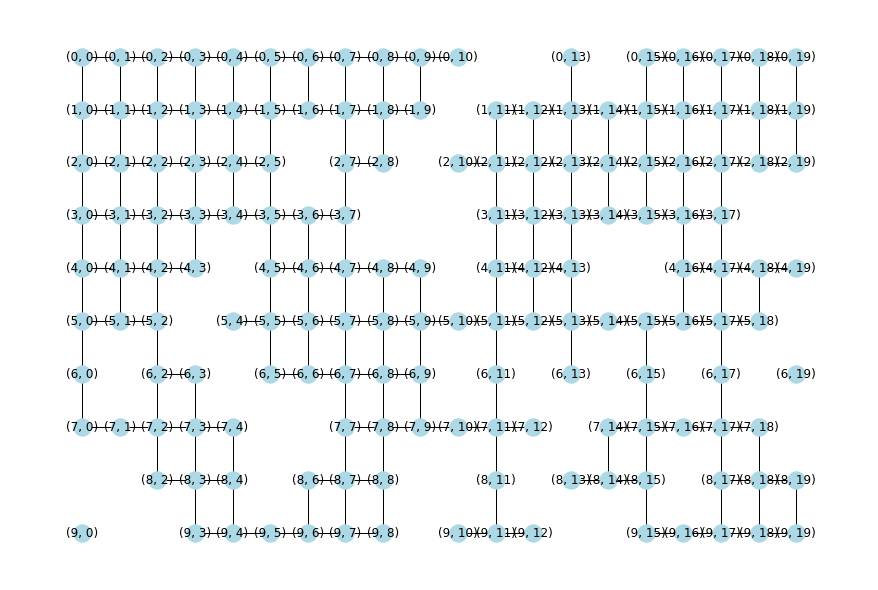

In [202]:
pos = {(x,y):(y,-x) for x, y in graph.nodes()}

plt.figure(figsize=(12, 8))
nx.draw(graph, pos, with_labels=True, node_color="lightblue")

1. path from (0, 16) to (0, 7)


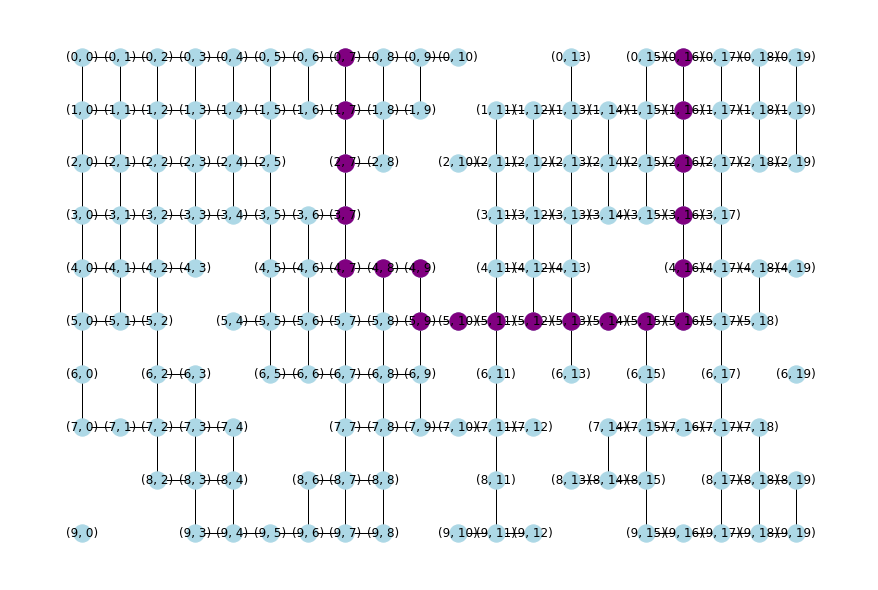

2. path from (7, 12) to (7, 3)


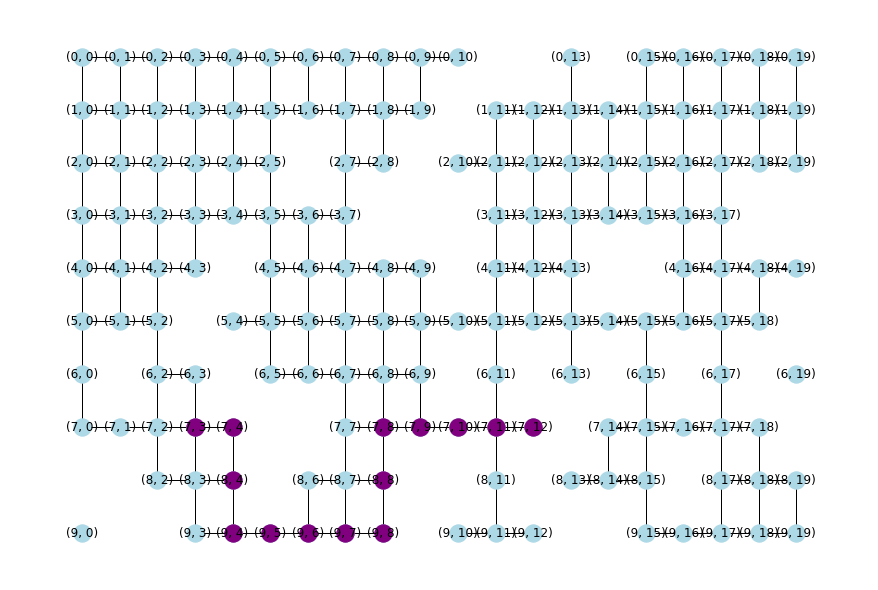

3. path from (5, 4) to (9, 17)


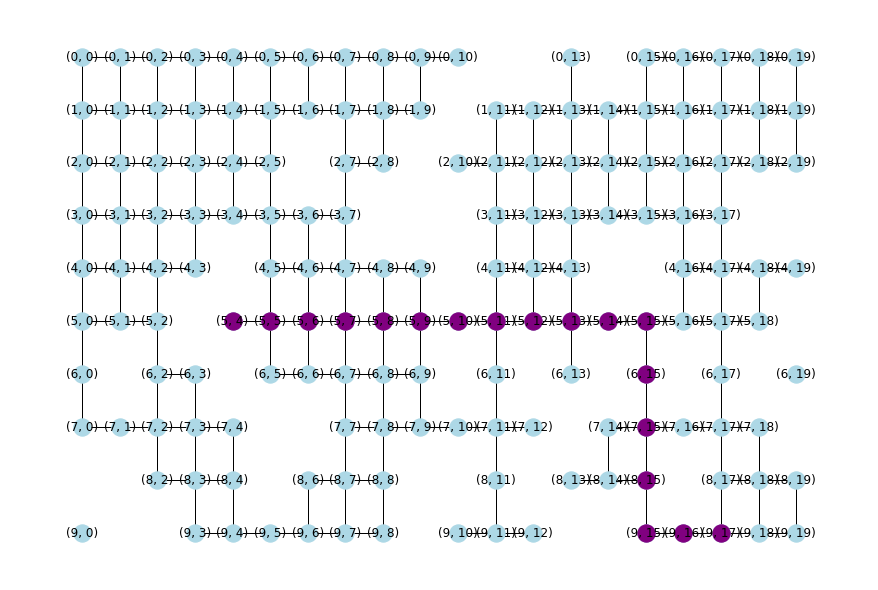

4. path from (6, 9) to (7, 11)


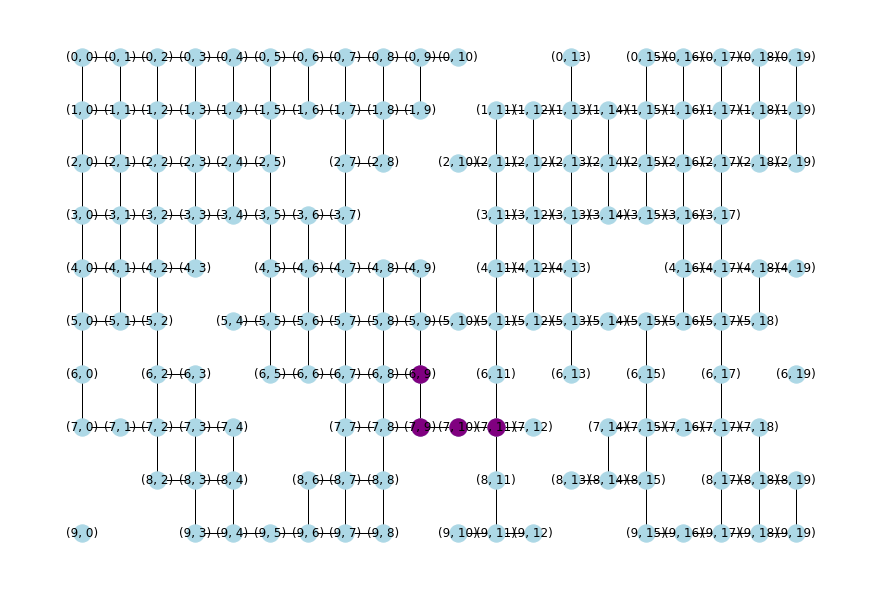

5. path from (2, 2) to (3, 0)


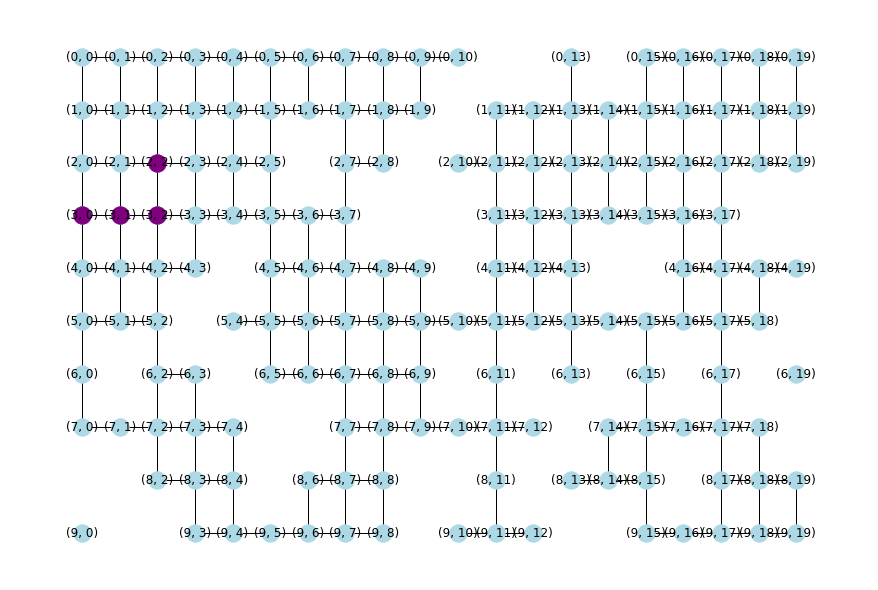

In [203]:
times = []

for _ in range(5):
    # generate start and end node
    source = nodes[np.random.randint(len(nodes))]
    target = nodes[np.random.randint(len(nodes))]

    start = time.time()
    path = nx.astar_path(graph, source, target)
    times.append(time.time() - start)

    # draw graph
    print(f'{_+1}. path from {source} to {target}')
    plt.figure(figsize=(12, 8))
    nx.draw(graph, pos, with_labels=True, node_color="lightblue")
    nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color="purple")
    plt.show()


In [204]:
print(f'A*\'s average time: {np.mean(times)}')

A*'s average time: 0.00019941329956054687
